# Frequency-Resolved Optical Gating (FROG)
<a href="https://imgur.com/DkFcu7L"><img src="https://i.imgur.com/DkFcu7L.jpg" title="source: imgur.com" width="150px"/></a>

This notebook demonstrates how the signals of the polarization-gated FROG (<strong>PG-FROG</strong>) are obtained using numerical simulation. In addition, a training dataset for neural networks will be created by running the all codes in this notebook.  

# Theoretical background
## Introduction
Basic theoretical background can be found in the following materials
- Electric field and temporal phases: reference [1], page 21-23
- Theoretical background, actual FROG traces, and experimental conditions: reference [1] page 118-122  

## Temporal and spectral profile
In the present study, a laser pulse with a Gaussian profile and quadratic temporal phase is considered:
$$
    E(t) = E_0exp(-at^2)exp(ibt^2).
$$
Here, E<sub>0</sub> is the amplitude (constant), a is the parameter that determines the pulse width, and b is the chirp parameter. In this case, the temporal phase is simply
$$
    \phi(t) = -bt^2.
$$
The Fourier transform of this field is 
$$
    \tilde{E}(\omega)=\frac{\sqrt{\pi}}{a-ib}exp\biggl(-\frac{\omega^2}{4(a-ib)}\biggr)
$$

## FROG
In order to get a FROG trace, an autocorrelation signal based on nonlinear optical effect is resolved in terms of frequency. The PG-FROG trace is 
$$
    I_{PG-FROG}(\omega , \tau)=\biggl|\int_{-\infty}^{\infty}E(t)|E(t-\tau)|^2exp(-i\omega t)dt\biggr|^2,
$$
where &omega; is the angular frequency, t is the time, E(t) is the complex pulse field versus time, and &tau; is the delay between the two replicas of the pulse. The integral part is basically the Fourier transformation of E(t)|E(t-&tau;)|<sup>2</sup>.


## Reference
[1] Rick Trebino, "[Frequency-resolved optical gating: The measurement of ultrashort laser pulses](https://link.springer.com/book/10.1007/978-1-4615-1181-6)," Springer Science+Business Media New York (2000)  
[2] Rick Trebino, Kenneth W. DeLong, David N. Fittinghoff, John N. Sweetser, Marco A. Krumbügel, and Bruce A. Richman, "Measuring ultrashort laser pulses in the time-frequency domain using frequency-resolved optical gating," Rev. Sci. Instrum. 68, 3277 (1997)

# Numerical simulation

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import os
datpath="/content/drive/My Drive/Colab Notebooks/FROG"
os.chdir(datpath)
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/FROG'

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from frog_func import * # functions for simulating FROG traces

The functions called `e_temporal` and `e_spectral` will be used to visualize the temporal and spectral profiles of the laser pulse. In order to use these functions, you have to specify parameters:  
<strong>params={  
    'e0':1,  
    'fwhm':50, # FWHM in fs  
    'b':0.003*1e30,  
    'wl0':800 # wavelength in nm
}</strong>


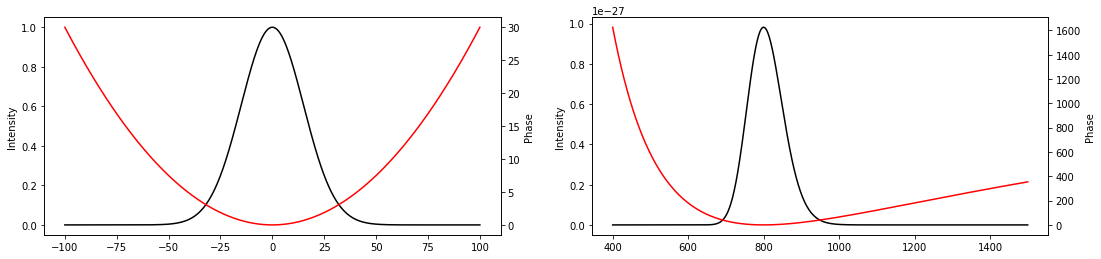

In [0]:
params={
    'e0':1,
    'fwhm':50, # FWHM in fs
    'b':0.003*1e30,  
    'wl0':800 # wavelength in nm
}

tim=np.linspace(-100,100,10001)  # tim in fs
wl=np.linspace(400,1500,1001) # wavelength in nm

e_temporal_profile, temp_phase = e_temporal(tim,params) 
e_spectral_profile, spec_phase = e_spectral(wl,params) 

plt.figure(figsize=(18,4))
plt.subplot(121)
plt.plot(tim, np.abs(e_temporal_profile)**2, 'k')
plt.ylabel("Intensity")
plt.twinx()
plt.plot(tim,temp_phase,'r')
plt.ylabel("Phase")
plt.xlabel("Time (fs)")

plt.subplot(122)
plt.plot(wl, np.abs(e_spectral_profile),'k')
plt.ylabel("Intensity")
plt.twinx()
plt.plot(wl,spec_phase,'r')
plt.ylabel("Phase")
plt.xlabel("Wavelength (nm)")

plt.show()

24.792054312783723
7.712711142355447


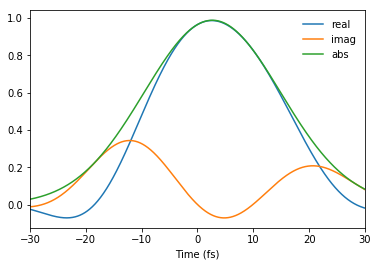

In [0]:
wl=790 # nm
tau = 4 # fs

omega = 2*np.pi*c_light/(wl*1e-9)

print(integrate.quad(real_integrant, -1000,1000, args=(params,omega,tau))[0])
print(integrate.quad(imag_integrant, -1000,1000, args=(params,omega,tau))[0])

tim=np.linspace(-2000,2000,100001) # fs

plt.plot(tim,real_integrant(tim, params,omega,tau),label="real")
plt.plot(tim,imag_integrant(tim, params,omega,tau), label="imag")

plt.plot(tim,np.abs(real_integrant(tim, params,omega,tau)+1j*imag_integrant(tim, params,omega,tau)), label="abs")
plt.xlabel('Time (fs)')
plt.legend(frameon=False)
plt.xlim([-30,30])
plt.show()

In [0]:
params={
    'e0':1,
    'fwhm':20, # FWHM / fs
    'b':-0.005*1e30,  # chirp  rad/s^2
    'wl0':800, # central wavelength / nm
    'num_delay_steps':64, # number of delay steps
    'num_wl_steps':64, # number of wavelength steps
    'tau_min':-70, # delay range (min) /fs
    'tau_max':70, # delay range (max) /fs 
    'wl_min':500, # scan wavelength range (min) /nm
    'wl_max':1200, # scan wavelength range (max) /nm
    'tmin':-200, # integral range /fs
    'tmax':200 # integral range /fs
        }

sig, delay, wl = frog_signal(params)

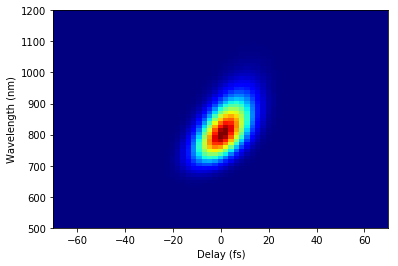

In [0]:
img=np.array(sig) # convert to numpy array 
img=img.reshape(params['num_delay_steps'],params['num_delay_steps']).T # reshaping
img=img-np.min(img) # subtract minimum
img=img/np.max(img) # normalization
plt.pcolor(delay,wl,img,cmap='jet')
plt.xlabel('Delay (fs)')
plt.ylabel('Wavelength (nm)')
#plt.imsave('frog_test.jpg',img,cmap='gray')
plt.imsave('frog_test.jpg',img,cmap='jet')
plt.show()

In [0]:
import os
datpath= os.getcwd() + "/train_label.txt"
f = open(datpath, mode = 'w') 

num_step1=40
num_step2=40

fwhm=np.linspace(10,30,num_step1) 
b=np.linspace(-0.01,0.01,num_step2)
#wl0=np.linspace(790,810,num_step)

count_num = 0

for i in range(num_step1):
    for j in range(num_step2):
        print("%0.2f / 100"%(count_num/(num_step1*num_step2)*100))
        params={
                'e0':1,
                'fwhm':fwhm[i], # FWHM / fs
                'b':b[j]*1e30,  # chirp  rad/s^2
                'wl0':800, # central wavelength / nm
                'num_delay_steps':64, # number of delay steps
                'num_wl_steps':64, # number of wavelength steps
                'tau_min':-70, # delay range (min) /fs
                'tau_max':70, # delay range (max) /fs 
                'wl_min':500, # scan wavelength range (min) /nm
                'wl_max':1200, # scan wavelength range (max) /nm
                'tmin':-200, # integral range /fs
                'tmax':200 # integral range /fs
            }

        f.write("%d\t%f\t%f\n"%(count_num, params['fwhm'], params['b']*1e-30))

        sig, delay, wl = frog_signal(params)

        img=np.array(sig) # convert to numpy array 
        img=img.reshape(params['num_delay_steps'],params['num_delay_steps']).T # reshaping
        img=img-np.min(img) # subtract minimum
        img=img/np.max(img) # normalization

        plt.imsave('frog%d.jpg'%count_num,img)
        
        count_num = count_num + 1

f.close()
np.savetxt("delay.txt",delay)
np.savetxt("wavelength.txt",wl)
print("100.0 / 100\nFinished...")